# Igressantes CeT

#### Primeiro são importadas as tabelas de ingressantes de 2009 a 2018:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df_ingressos = pd.DataFrame()

# importando notas de 2010 a 2018
for i in range(2009,2019):
    df_ingresso = pd.read_csv('data_science/discentes/discentes-'+str(i)+'.csv',sep=';')
    # concatena as tabelas de 2010 a 2017
    df_ingressos = pd.concat([df_ingressos, df_ingresso])

In [32]:
# nivel de ensino - GRADUAÇÃO
df_ingressos = df_ingressos[df_ingressos["nivel_ensino"] == "GRADUAÇÃO"]

In [33]:
df_ingressos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85144 entries, 0 to 9855
Data columns (total 16 columns):
matricula               85144 non-null float64
nome_discente           85144 non-null object
ano_ingresso            85144 non-null int64
periodo_ingresso        85144 non-null float64
forma_ingresso          85144 non-null object
tipo_discente           85144 non-null object
status                  85144 non-null object
sigla_nivel_ensino      85144 non-null object
nivel_ensino            85144 non-null object
id_curso                83531 non-null float64
nome_curso              83531 non-null object
modalidade_educacao     83531 non-null object
id_unidade              83531 non-null float64
nome_unidade            83531 non-null object
id_unidade_gestora      83531 non-null float64
nome_unidade_gestora    83531 non-null object
dtypes: float64(5), int64(1), object(10)
memory usage: 11.0+ MB


#### Filtrando alunos do curso de Ciências e Tecnologia

In [34]:
# curso CeT
id_curso = 10320810.0
# filtrando igressantes de CeT
df_ingressoCeT = df_ingressos[df_ingressos["id_curso"] == id_curso]


df_ingressoCeT = df_ingressoCeT[df_ingressoCeT["nivel_ensino"] == "GRADUAÇÃO"]

In [35]:
df_ingressoCeT.ano_ingresso.value_counts()

2013    1278
2016    1243
2014    1239
2017    1231
2012    1224
2015    1176
2011    1155
2010    1152
2018    1050
2009     524
Name: ano_ingresso, dtype: int64

In [36]:
df_ingressoCeT.status.value_counts()

CANCELADO           5062
ATIVO               3304
CONCLUÍDO           1745
CADASTRADO           445
TRANCADO             399
ATIVO - FORMANDO     309
FORMADO                8
Name: status, dtype: int64

##### CANCELADO: mudou de curso ou abandonou a universidade;
##### ATIVO: matriculado;
##### CONCLUÍDO: colou grau;
##### CADASTRADO: ainda não estão cursando;
##### TRANCADO: trancou o curso, ainda tem chance de voltar;
##### ATIVO - FORMANDO: pagando as ultimas matérias obrigatórias para colar grau;
##### FORMADO: está faltando apenas a colação de grau. 

## Gráfico que mostra o status dos alunos nos anos de 2009 a 2018

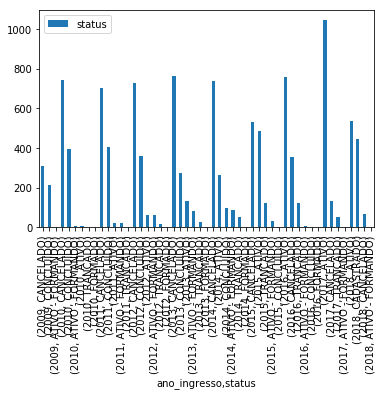

In [37]:
df_groupAno = pd.DataFrame(df_ingressoCeT.groupby('ano_ingresso').status.value_counts())
df_groupAno.plot.bar()

In [38]:
df_groupAno.head(6)

status
ano_ingresso status                  
2009         CANCELADO            310
             CONCLUÍDO            213
             ATIVO - FORMANDO       1
2010         CANCELADO            740
             CONCLUÍDO            393
             ATIVO - FORMANDO       8

### Serie com apenas os discentes de CeT

In [39]:
# filtra apenas alunos que passaram por CeT
series_alunosCeT = df_ingressoCeT["nome_discente"]
type(series_alunosCeT)

pandas.core.series.Series

### Serie dos discentes que cancelaram

In [40]:
series_cancelados = df_ingressos[df_ingressos["status"] == "CANCELADO"].nome_discente
type(series_cancelados)
# series_alunosCancel = np.unique(df_cancelados.come_discente)

pandas.core.series.Series

### Interseção dos alunos de CeT e Cancelados

In [41]:
series_intersecao = series_cancelados[series_cancelados.isin(series_alunosCeT)]

### Agrupar por curso

In [42]:
df_alvo = df_ingressos[df_ingressos["nome_discente"].isin(series_intersecao)]
df_porCurso = pd.DataFrame(df_alvo.groupby(['nome_discente', 'nome_curso','ano_ingresso', 'periodo_ingresso']).status.value_counts())
df_porCurso.head()

status
nome_discente                      nome_curso            ano_ingresso periodo_ingresso status           
\tFRANCISCO MOURA DO VALE NETO\t   ADMINISTRAÇÃO PÚBLICA 2010         1.0              CANCELADO       1
                                   CIÊNCIAS E TECNOLOGIA 2010         2.0              CANCELADO       1
AARON ROBSON RODRIGUES DE OLIVEIRA CIÊNCIAS E TECNOLOGIA 2011         2.0              CANCELADO       1
ABDIAS DA SILVA TAVARES            CIÊNCIAS E TECNOLOGIA 2011         1.0              CANCELADO       1
                                                         2017         1.0              CANCELADO       1

### Series: alunos que não desistiram

In [47]:
series_trocaCurso = df_alvo[df_alvo["status"] != 'CANCELADO'].nome_discente

### Series: alunos que abandonaram a graduação

In [57]:
df_abandonaram = df_alvo[~df_alvo["nome_discente"].isin(series_trocaCurso)].nome_discente

In [63]:
print("Cancelamentos por:")
print("- Abandono da Universidade: ")
print(df_abandonaram.shape)
print()
print("- Mudança de curso: ")
print(df_trocaCurso.shape)

Cancelamentos por:
- Abandono da Universidade: 
(3810,)

- Mudança de curso: 
(2751,)
